In [1]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

import rasterio
import sys
import os

sys.path.append('../../scripts/')
import landcover_definitions as lc



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
classes_keep = [1,2,3,4,6]

def reindex_ea(array_in, classes_keep):
    ignore_index = len(classes_keep)
    reindex_map = dict(zip(classes_keep, np.arange(len(classes_keep))))
    # reindex shrub to tree
    tree_idx = 3 # tree idx is 3 when there are no zeros
    shrub_idx = 5
    reindexed_mask = -1 * np.ones(array_in.shape)
    for old_idx, new_idx in reindex_map.items():
        reindexed_mask[array_in == old_idx] = new_idx

    reindexed_mask[reindexed_mask == -1] = ignore_index

    return reindexed_mask

colors = [lc.lc_colors['enviroatlas'][c] for c in classes_keep]

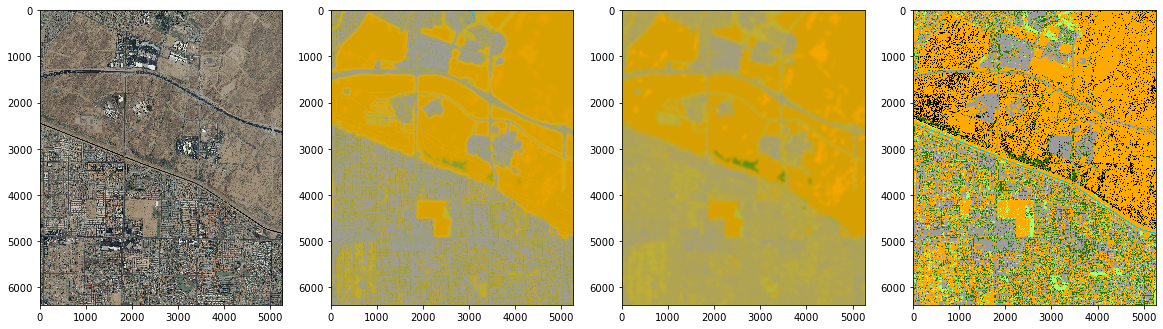

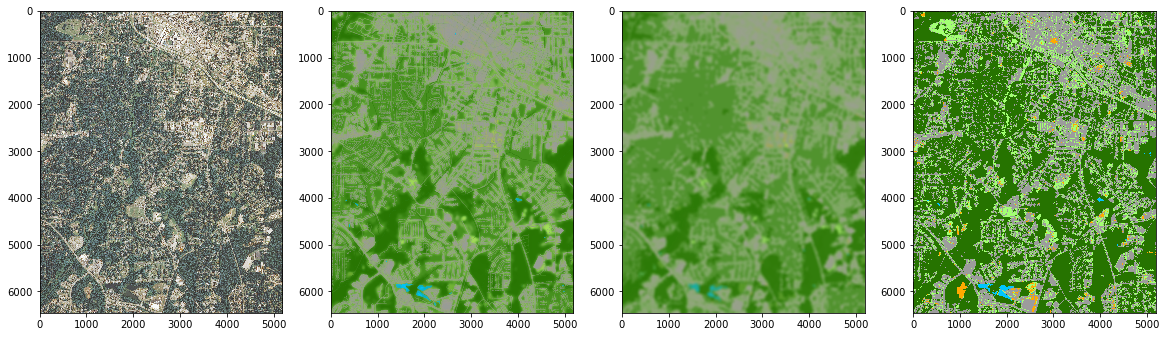

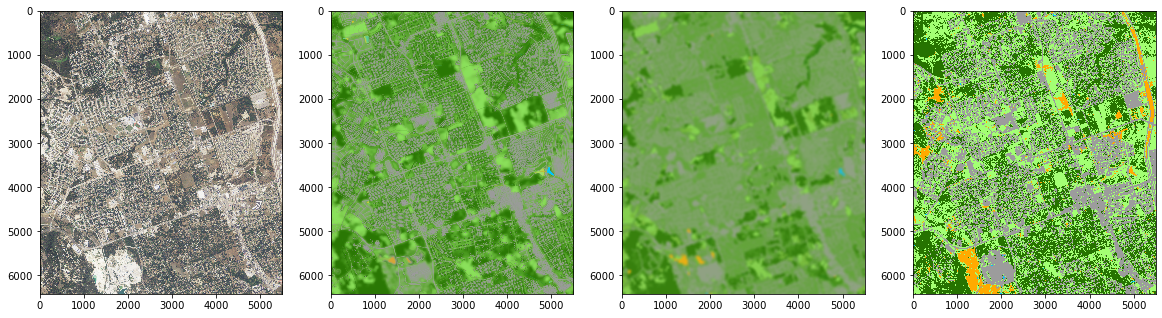

In [ ]:
states = [
   'phoenix_az-2010_1m',
   'durham_nc-2012_1m', 
   'austin_tx-2012_1m',
   'pittsburgh_pa-2010_1m'
]

data_dir_ea = '/datadrive/esther/torchgeo_data/enviroatlas_lotp'

for state in states:
    tile_ids = np.unique([x[:10] for x in os.listdir(f'{data_dir_ea}/{state}-test_tiles-debuffered/')])

    for tile_id in tile_ids[:1]:
        image_fn = f'{data_dir_ea}/{state}-test_tiles-debuffered/{tile_id}_a_naip.tif'
        learned_prior_fn = f'{data_dir_ea}/{state}-test_tiles-debuffered/{tile_id}_prior_learned_101_31.tif'
        prior_fn  = f'{data_dir_ea}/{state}-test_tiles-debuffered/{tile_id}_prior_from_cooccurrences_101_31_no_osm_no_buildings.tif'
        label_fn = f'{data_dir_ea}/{state}-test_tiles-debuffered/{tile_id}_h_highres_labels.tif'

        learned_prior = rasterio.open(learned_prior_fn).read()
        handmade_prior = rasterio.open(prior_fn).read()
        img = rasterio.open(image_fn).read()
        h = lc.map_raw_lc_to_idx['enviroatlas'][rasterio.open(label_fn).read()[0]]

        h_copy = h.copy()
        for i, cls in enumerate(classes_keep):
            h_copy[h == cls] = i

        fig, ax = plt.subplots(1,4, figsize=(20,8))
        ax[0].imshow(img[:3].T.swapaxes(0,1),interpolation='none')
        ax[1].imshow(lc.vis_lc_from_colors(learned_prior, colors).T.swapaxes(0,1),interpolation='none')
        ax[2].imshow(lc.vis_lc_from_colors(handmade_prior, colors).T.swapaxes(0,1),interpolation='none')
        ax[3].imshow(lc.vis_lc_from_colors(h_copy, colors).T.swapaxes(0,1),interpolation='none')
        plt.show()